In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv"

dados = pd.read_csv(uri)
dados.head()


,nao_finalizado,horas_esperadas,preco
0,0,75.0,6985.000000
1,1,0.0,4325.293458
2,0,87.0,14205.000000
3,1,13.0,100.000000
4,0,2.0,202.000000


In [4]:
dados["finalizado"] = dados ["nao_finalizado"].map({1: 0, 0: 1})
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.000000,1
1,1,0.0,4325.293458,0
2,0,87.0,14205.000000,1
3,1,13.0,100.000000,0
4,0,2.0,202.000000,1


<Axes: xlabel='horas_esperadas', ylabel='preco'>

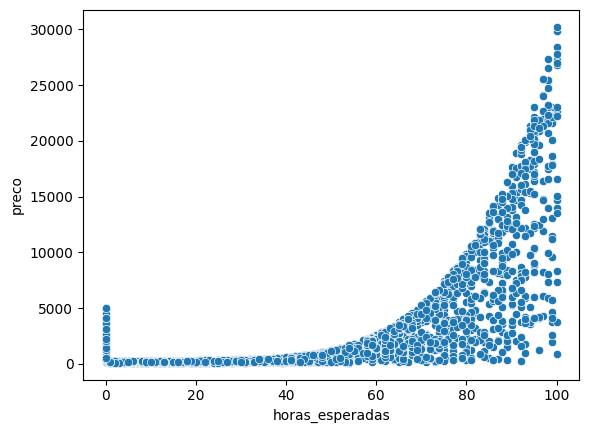

In [8]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

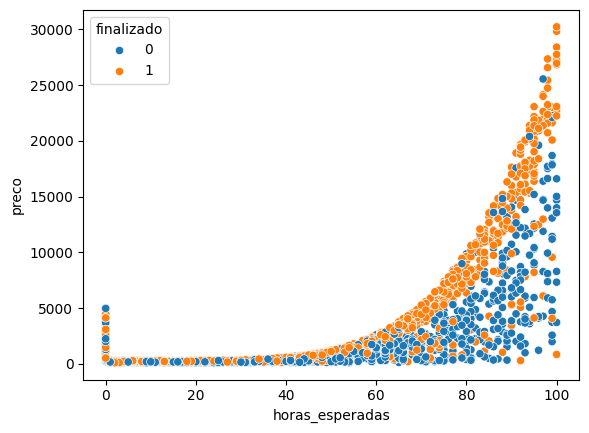

In [9]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado")

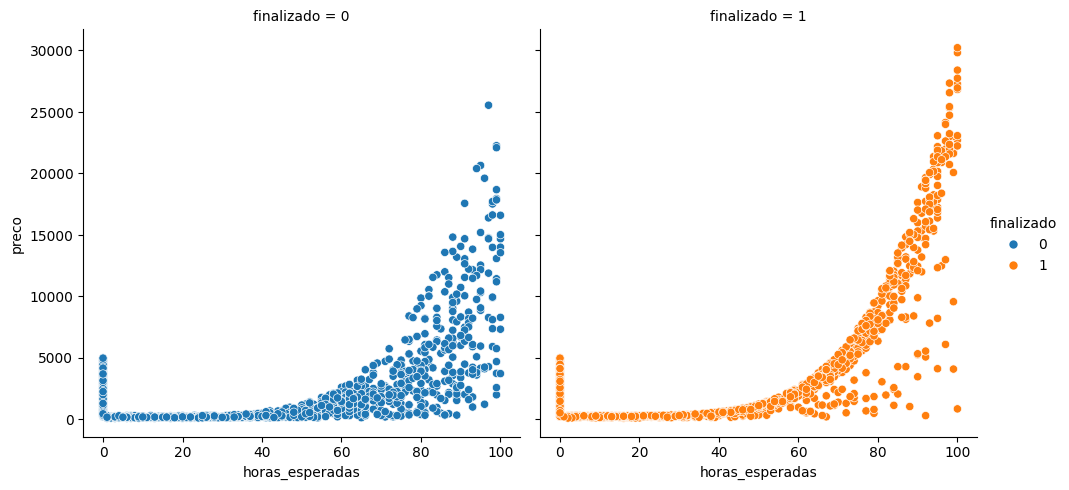

In [11]:
sns.relplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado", col="finalizado")

In [12]:
#jogar fora as linhas com horas_esperadas = 0
dados = dados.query("horas_esperadas > 0")
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.0,1
2,0,87.0,14205.0,1
3,1,13.0,100.0,0
4,0,2.0,202.0,1
5,0,49.0,1096.0,1


In [13]:
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

In [14]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state = SEED , stratify=y)

print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 47.41%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
previsoes_de_base = teste_y.sum() / len(teste_y) * 100
print(f"A acurácia do modelo de base foi de {previsoes_de_base:.2f}%")

A acurácia do modelo de base foi de 52.59%


In [21]:
x_min = teste_x["horas_esperadas"].min()
x_max = teste_x["horas_esperadas"].max()
y_min = teste_x["preco"].min()
y_max = teste_x["preco"].max()
print(f"x_min: {x_min}")
print(f"x_max: {x_max}")
print(f"y_min: {y_min}")

print(f"y_max: {y_max}")

x_min: 1.0
x_max: 100.0
y_min: 102.0
y_max: 30223.0


In [24]:
from math import e
import numpy as np
pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [32]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.020000e+02],
       [1.990000e+00, 1.020000e+02],
       [2.980000e+00, 1.020000e+02],
       ...,
       [9.703000e+01, 2.992179e+04],
       [9.802000e+01, 2.992179e+04],
       [9.901000e+01, 2.992179e+04]])

In [44]:
Z = modelo.predict(pontos)
Z= Z.reshape(xx.shape)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

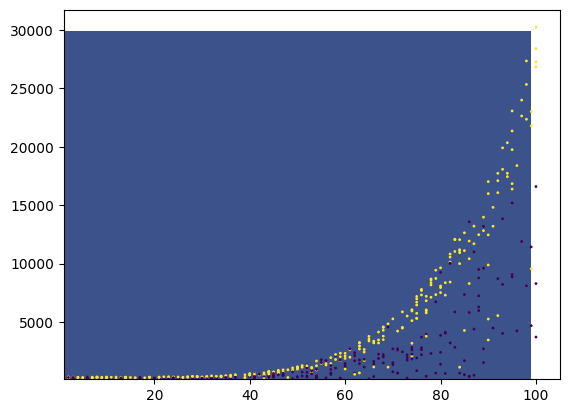

In [46]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z)
plt.scatter(teste_x["horas_esperadas"], teste_x["preco"], c=teste_y, s=1)

SVC

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state = SEED , stratify=y)

print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 57.78%


x_min: 1.0
x_max: 100.0
y_min: 102.0
y_max: 30223.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


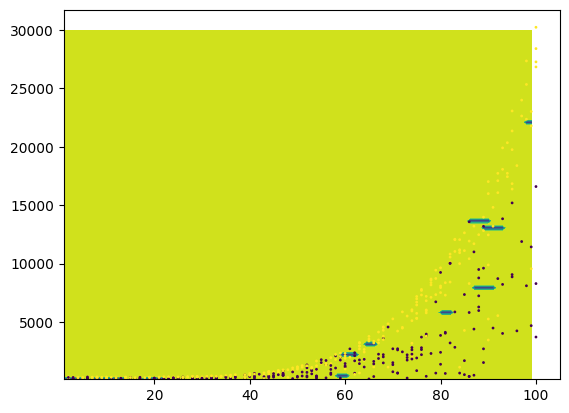

In [52]:
x_min = teste_x["horas_esperadas"].min()
x_max = teste_x["horas_esperadas"].max()
y_min = teste_x["preco"].min()
y_max = teste_x["preco"].max()
print(f"x_min: {x_min}")
print(f"x_max: {x_max}")
print(f"y_min: {y_min}")

print(f"y_max: {y_max}")


pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]



Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z)
plt.scatter(teste_x["horas_esperadas"], teste_x["preco"], c=teste_y, s=1)

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, random_state = SEED , stratify=y)

print(f"Treinaremos com {len(raw_treino_x)} elementos e testaremos com {len(raw_teste_x)} elementos")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 68.52%


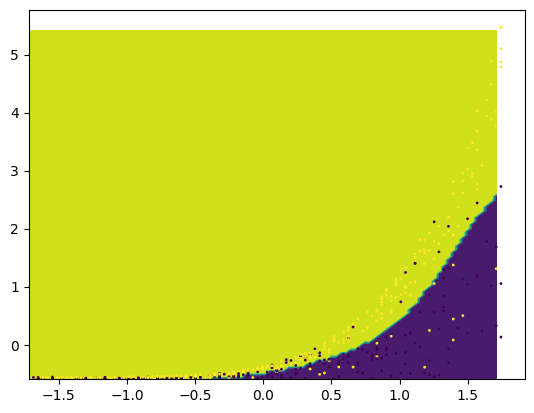

In [56]:
data_col1 = teste_x[:, 0]
data_col2 = teste_x[:, 1]

x_min = data_col1.min()
x_max = data_col1.max()
y_min = data_col2.min()
y_max = data_col2.max()



pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]



Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z)
plt.scatter(data_col1, data_col2, c=teste_y, s=1)